In [ ]:
#EDA

In [1]:

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
#data import
file_location="/Users/SharonLam/Desktop/Online Courses/Bittiger/BA/Project2/"
file_name = "Python_project_eda.csv"
my_data = pd.read_csv(file_location + file_name)

In [3]:
my_data.head()

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,NaN,NaN,NaN,0,NaN,NaN,13705367724816913241,1
2,0,NaN,IN,0,False,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,NaN,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [4]:
my_data.shape

(566699, 15)

In [5]:
#summary statistics
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,67.808838,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,214.097885,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.002991,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,22519.570000,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [9]:
# deal with Outliers
def winsorize_series(s):
    lower = s.quantile(0.05)
    upper = s.quantile(0.95)
    s[s < lower] = lower
    s[s > upper] = upper
    return s

In [10]:
my_data['spend_usd_next_14_days'] = winsorize_series(my_data['spend_usd_next_14_days'])

/Users/SharonLam/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/SharonLam/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
my_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,495640.000000,566699.000000,495640.000000,495640.000000,89032.000000,170597.000000,170597.000000,566699.000000,170597.000000,170597.000000,5.666990e+05,566699.000000
mean,0.621745,0.257782,0.268135,0.211127,0.933662,49.806191,0.548556,0.479581,0.301036,0.184915,0.099937,9.222149e+18,0.874609
std,1.701956,0.437414,0.442989,0.408109,0.248873,76.009381,0.497638,0.499584,0.458709,0.388230,0.299917,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.026880,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,4.990000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,15.828656,1.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,54.795602,1.000000,1.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [17]:
# clean up data
clean_data = my_data.fillna(0)
clean_data.head(5)

,buyer_week_before,clicked_buy_before,country,existing_buyer,initial_fop_set,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
0,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,18321316048201303366,1
1,0,0.0,IN,0,False,0.0,1.0,0.000000,0.0,0.0,0,0.0,0.0,13705367724816913241,1
2,0,0.0,IN,0,False,0.0,0.0,0.000000,0.0,0.0,0,0.0,0.0,6605724765451655114,0
3,0,1.0,CA,1,True,1.0,1.0,7.398815,1.0,0.0,1,0.0,0.0,2340067911948261502,1
4,7,1.0,PL,1,True,1.0,1.0,0.000000,0.0,1.0,1,0.0,0.0,11891045596810635427,1


In [18]:
clean_data.describe()

,buyer_week_before,clicked_buy_before,existing_buyer,made_purchase_before,saw_cart_before,spend_usd_next_14_days,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,user_id,visit_before
count,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,566699.000000,5.666990e+05,566699.000000
mean,0.621745,0.225458,0.268135,0.184654,0.816589,7.824868,0.165135,0.144371,0.301036,0.055666,0.030085,9.222149e+18,0.874609
std,1.701956,0.417884,0.442989,0.388017,0.387004,35.159074,0.371303,0.351466,0.458709,0.229276,0.170821,5.319984e+18,0.331162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.099261e+12,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.614402e+18,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.218982e+18,1.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.382236e+19,1.000000
max,8.000000,1.000000,1.000000,1.000000,1.000000,289.344500,1.000000,1.000000,1.000000,1.000000,1.000000,1.844674e+19,1.000000


In [76]:
potential_buyer = clean_data[['existing_buyer', 'saw_cart_before', 'user_added_credit_card', 'user_added_dcb', 'user_added_fop', 'user_added_gift_card', 'user_added_paypal' ,'spend_usd_next_14_days']][(clean_data.existing_buyer == 0) & (clean_data.saw_cart_before == 1.0)]
potential_buyer.describe()


,existing_buyer,saw_cart_before,user_added_credit_card,user_added_dcb,user_added_fop,user_added_gift_card,user_added_paypal,spend_usd_next_14_days
count,321389.0,321389.0,321389.000000,321389.000000,321389.000000,321389.000000,321389.000000,321389.000000
mean,0.0,1.0,0.016444,0.042945,0.062068,0.001658,0.002321,0.150539
std,0.0,0.0,0.127177,0.202733,0.241280,0.040690,0.048123,3.612179
min,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,289.344500


In [72]:
total_target = potential_buyer.shape[0]
total_target

321389

In [71]:
def GetCount(data, column):
    new_data = data[[column]][(data[column] == 1) & (data.spend_usd_next_14_days > 0.0)]
    return (new_data.count())
#cc_data = potential_buyer[['user_added_credit_card']][(potential_buyer['user_added_credit_card'] == 1) & (potential_buyer.spend_usd_next_14_days > 0.0)]
cc_rate = GetCount(potential_buyer, 'user_added_credit_card') / float(total_target)
dc_rate = GetCount(potential_buyer, 'user_added_dcb') / float(total_target)
gc_rate = GetCount(potential_buyer, 'user_added_gift_card') / float(total_target)
pp_rate = GetCount(potential_buyer, 'user_added_paypal') / float(total_target)
new_buyer = potential_buyer[['spend_usd_next_14_days']][potential_buyer.spend_usd_next_14_days > 0.0].count()
new_buyer

spend_usd_next_14_days    3651
dtype: int64

In [73]:
total_rate = new_buyer/float(total_target)
total_rate

spend_usd_next_14_days    0.01136
dtype: float64

In [75]:
cc_rate

user_added_credit_card    0.00108
dtype: float64

In [58]:
## excluding other fop
test = potential_buyer[['existing_buyer']][(potential_buyer.user_added_credit_card == 0) & (potential_buyer.user_added_dcb == 0) & (potential_buyer.user_added_fop == 1) & (potential_buyer.user_added_paypal == 0) & (potential_buyer.user_added_gift_card == 0)].count()
test

existing_buyer    1
dtype: int64

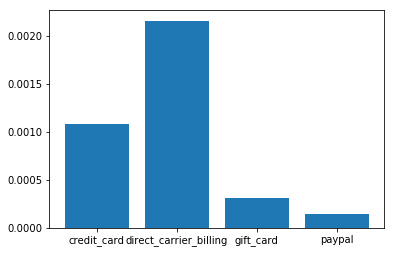

In [62]:
plt_data = [cc_rate, dc_rate, gc_rate, pp_rate]
plt_index = ['credit_card', 'direct_carrier_billing', 'gift_card', 'paypal']
plt.bar((1, 2, 3, 4), plt_data, align='center')
plt.xticks((1, 2, 3, 4), plt_index)
plt.show()

In [66]:
e_buyer = my_data["spend_usd_next_14_days"][(my_data.existing_buyer == 1) & (my_data.spend_usd_next_14_days > 0)]
e_buyer.sum()

4361087.668324203

In [67]:
n_buyer = my_data["spend_usd_next_14_days"][(my_data.existing_buyer == 0) & (my_data.spend_usd_next_14_days > 0)]
n_buyer.sum()

73257.13473700019

In [77]:
real_new = potential_buyer[['spend_usd_next_14_days']][(potential_buyer.spend_usd_next_14_days > 0.0) & (potential_buyer.user_added_credit_card == 0) & (potential_buyer.user_added_dcb == 0) & (potential_buyer.user_added_fop == 0) & (potential_buyer.user_added_paypal == 0) & (potential_buyer.user_added_gift_card == 0)].count()
real_new

spend_usd_next_14_days    2508
dtype: int64